In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community.community_louvain as community_louvain
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Read the dataset, create a networkx graph and calculate communities

'''
The content of abstract looks like below

[['only barriers', 'reproduction', 'related species', 'female mate'], ['change', 'formation', 'new species'],
 ['role', 'environment', 'process'], ['fish native', 'trinidad', 'brighter', 'orange spots'], ['food carotenoids'], 
 ['main source', 'stream'], ['wider streams', 'forest canopy', 'sunlight', 'algae'], ['project', 'variation', 'canopy cover', 'evolution', 'male coloration'],
 ['field experiments', 'laboratory breeding', 'color measurements', 'biochemical analyses.the', 'broader goal', 'understanding', 'mate preferences'],
 ['study', 'knowledge', 'biological diversity']
]

 keywords within inner array are in the same sentence level and co-occurrance is assumed.

'''

df = pd.read_csv('/content/drive/MyDrive/nsf/dataset_abstract.csv')
df = df[df['Year']==2000]
df = df[['Abstract_Preprocessed']]
G = nx.Graph()
count = 0

for ir, row in df.iterrows():
  count = count + 1
  sentences = row['Abstract_Preprocessed'].replace("], [","];[")
  sentences = sentences.split(';')
  for sentence in sentences:
   words = sentence.replace('[[','').replace('[','').replace(']','').replace("'","").split(',') 
   for i in range(0,len(words)):
     for j in range(0,len(words)-1):
       if words[i] != words[j]:
         G.add_edge(words[i],words[j]) 
  if count == 100:
    break

comms = community_louvain.best_partition(G)
unique_comms = np.unique(list(comms.values()))

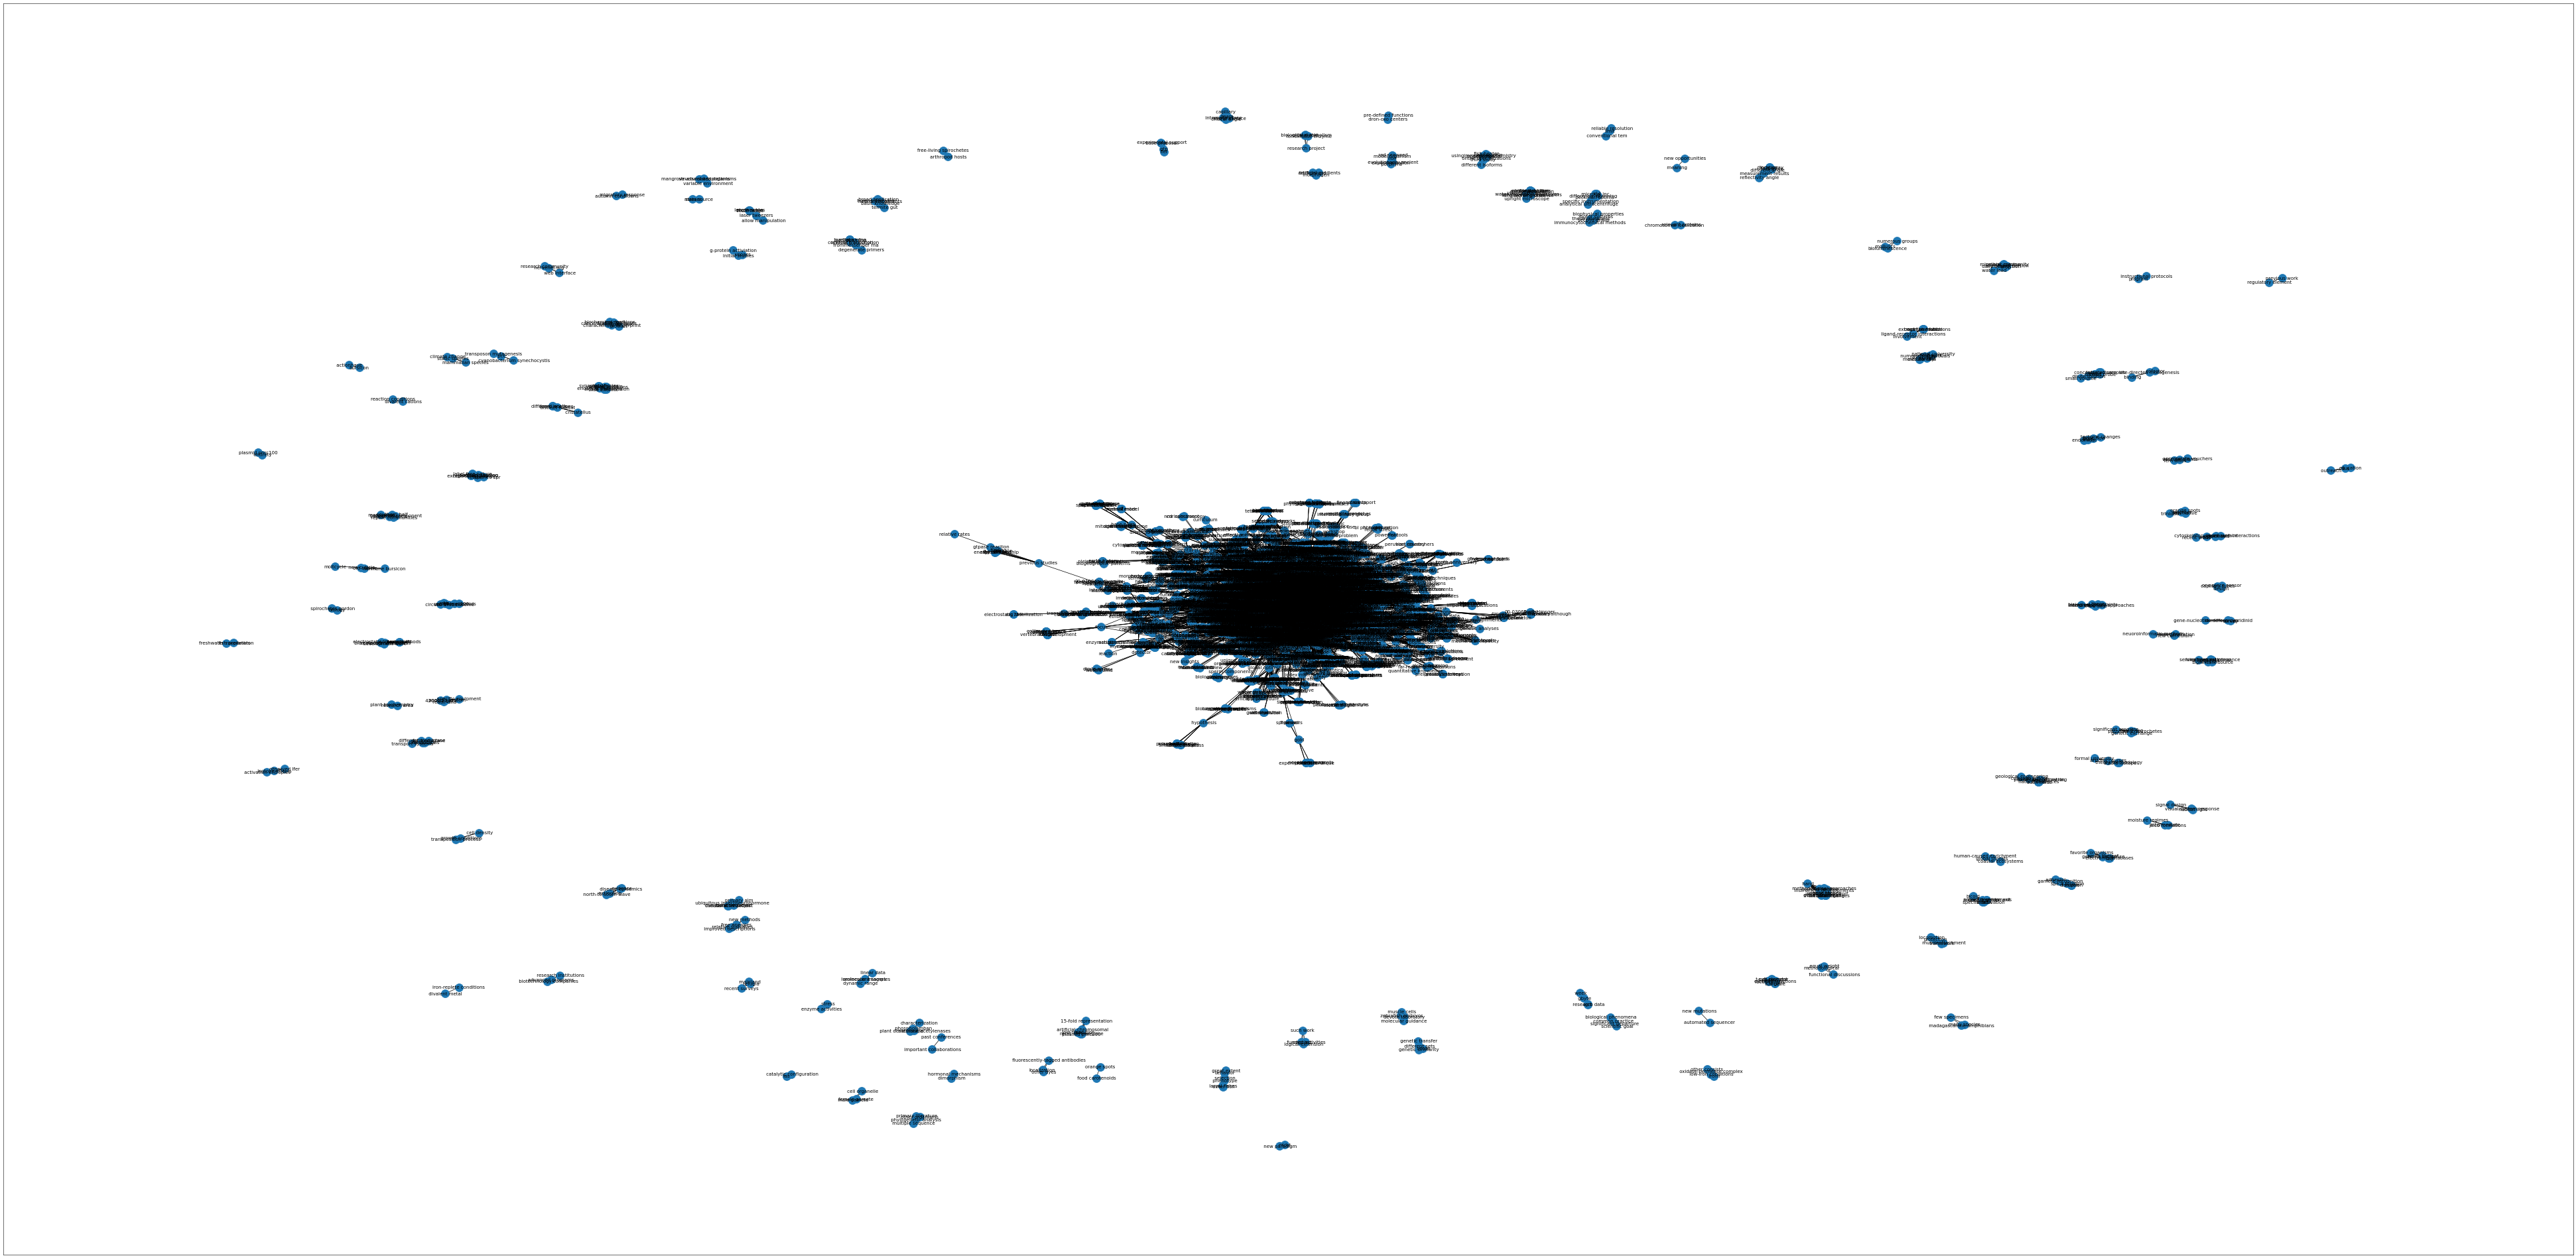

In [20]:
#visualizing networkx graph before removing clustering

fig = plt.figure(1, figsize=(100, 50), dpi=50)
pos = nx.spring_layout(G)
nx.draw_networkx(G,font_size=10)#, node_color=node_cmap)
plt.show()

In [21]:

#Calculating the avg clustering coeff to remove unhelpful clusters (avg clustering coeff is 0 or 1)
for k in range(0,len(unique_comms)):
  nodes = [i for i, j in comms.items() if j ==k]
  #topics_total = topics_total + len(nodes)
  avg_coeff=nx.average_clustering(G,nodes) 
  print('Cluster ',k,': ',nodes,': avg_coeff %2f.' %avg_coeff)
  if avg_coeff==1 or avg_coeff == 0: #removing if any cluster with avg_coeff = 1 (complete sub graph) or 0 (sub graph with only 2nodes)
    print('->Remove cluster ',k)
    G.remove_nodes_from(nodes)
    #topics_removed = topics_removed + len(nodes)


Cluster  0 :  ['singson0000182', ' reproductive biology', ' nematode worm', ' caenorhabditis', ' identification', ' other cells', ' plant', ' energy', 'such studies', ' new center', ' biomolecular nuclear', 'interference', ' bursiconrelease', ' animal', ' assignment', ' uncharacterized genes', ' regulatory networks', ' spectrometer', 'dr. marc', ' anderson', ' influence', ' environmental stress', ' metabolic processes', 'stable isotope', ' ratio mass', ' spectrometry', ' fundamental tool', ' nutrient flow', ' metabolism', ' physiology', ' human-dominated ecosystems', ' unique insights', ' physiological variation', ' temporal scales', ' plant samples', ' past climates', ' vegetation distribution', ' physiological responses', ' domesticated plants', ' characterize patterns', ' material transfers', ' microbial components', ' atmosphere-biosphere interactions', ' earths', ' human activities', ' global level', 'continuous-flow isotope', ' automated peripherals', ' sample-preparation', ' fin

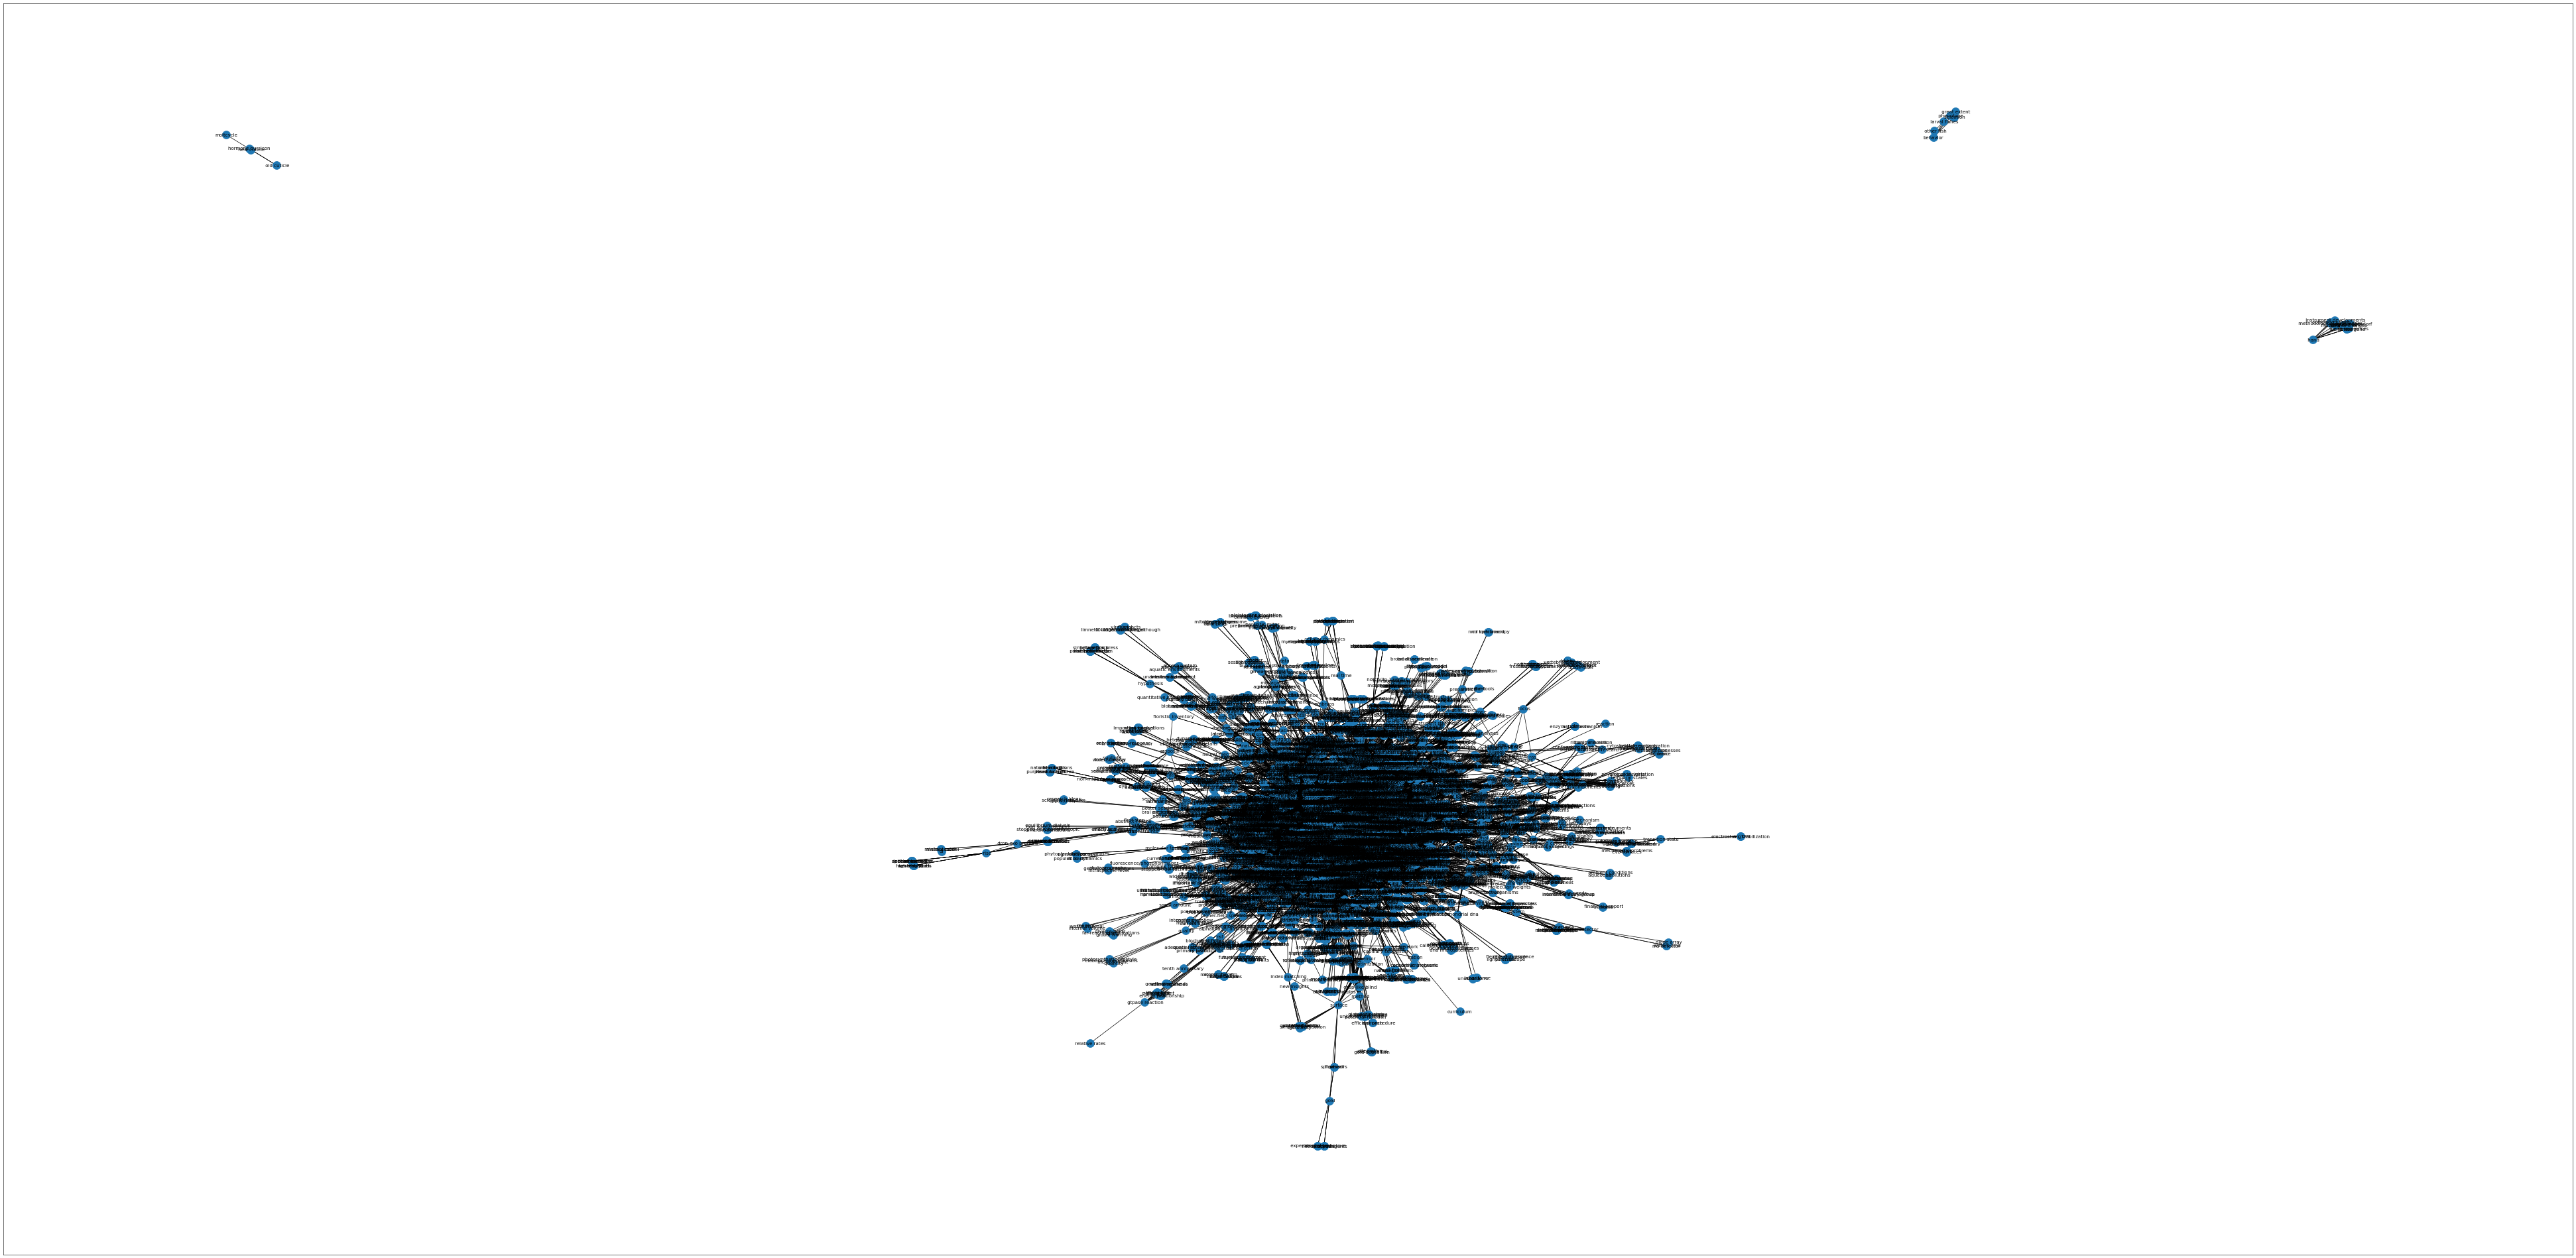

In [22]:
#Visualize the graph again
fig = plt.figure(1, figsize=(100, 50), dpi=50)
pos = nx.spring_layout(G)
nx.draw_networkx(G,font_size=10)#, node_color=node_cmap)
plt.show()
